**YOUR NAME = "Yujia Liu"**

***

## Individual Challenge 4: ANOVA


Analysis of Variance (ANOVA) is a statistical method used to determine whether there are any statistically significant differences between the means of three or more independent groups. It assesses whether the variability within groups is consistent with what would be expected by chance or if there are systematic differences that can be attributed to different conditions or treatments.

For this task, you will use the American National Election Study (ANES) (https://electionstudies.org/) to study differences among people who identify as Democrats, Republicans, and Independents. ANES is a national survey of voters in the United States, conducted before and after every presidential election.

Your first task is to perform ANOVA on this dataset to determine whether there are significant differences in the number of guns owned by these groups. Subsequently, you are encouraged to apply ANOVA to another variable that interests you in the second task.

Preparatory material: 
1. Statistical Thinking for the 21st Century, Chapter 15.6: https://statsthinking21.github.io/statsthinking21-core-site/comparing-means.html#comparing-more-than-two-means
2. Statistics by Jim, ANOVA tab: https://statisticsbyjim.com/anova/
***

## Read and explore the data

In [54]:
# First, ensure that you have the necessary Python libraries correctly installed.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway # ANOVA test
from statsmodels.stats.multicomp import pairwise_tukeyhsd # Tukey test
from scipy.stats import levene # Levene test
from scipy.stats import normaltest # D'Agostino's K^2 test

In [55]:
# Read and explore the data
df = pd.read_csv('anes_dataset.csv', low_memory=False)

# As you can see, most variables begin with "V" and lack clear names that directly identify what they measure.
# You can refer to the ANES codebook (available on Canvas) if you would like to learn more about specific variables.

## Task 1: Partisan identification and the guns owned

For the first task, we are focusing on two variables: partisan identification and the number of guns owned.

The variable 'V201228' contains information on the partisan identification of respondents. The question was phrased as follows: "Do you think of self as democrat, republican, or independent?"

The answers to this question are coded as follows:

-9: Refused

-8: Don’t know

-4: Technical error

0: No preference

1: Democrat

2: Republican

3: Independent

5: Other party

The variable 'V201628' provides information on the number of guns owned by respondents. The question was posed as follows: "How many guns do you or anyone else living here own?"

The responses to this question indicate the number of guns owned. In other instances, the answers were coded as follows:

-9. Refused

-5. Interview breakoff

In [56]:
# Rename the 'V201228' variable into 'party' variable.
# Rename the 'V201628' variable into 'guns' variable.

# YOUR CODE HERE
df.rename(columns={'V201228': 'party', 'V201628': 'guns'}, inplace=True)

In [57]:
# In the 'party' variable, leave only three categories (democrat, republican, independent) and recode all other values as missing values.
# In the 'guns' variable, recode -9 and -5 as missing values.

# YOUR CODE HERE
df.loc[~df['party'].isin([1,2,3]),'party'] = np.nan
df.loc[df['guns'].isin([-9,-5]),'guns'] = np.nan


In [58]:
# Drop missing values in both columns

# YOUR CODE HERE
df.dropna(subset=['party', 'guns'], inplace=True)

In [59]:
# In 'guns' variable, drop cases with > 50 guns.

# YOUR CODE HERE
df = df[df['guns'] <= 50]

In [60]:
# Display summary statistics of these two variables and interpret them.

# YOUR CODE HERE
df.loc[df['party']==1,'party']='Democrat'
df.loc[df['party']==2,'party']='Republican'
df.loc[df['party']==3,'party']='Independent'

/var/folders/2g/xfsvxxmd2158x4mn_qg2ycpr0000gn/T/ipykernel_26648/4106245799.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Democrat' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['party']==1,'party']='Democrat'


In [61]:
# describe party
df['party'].describe()

count         7341
unique           3
top       Democrat
freq          2766
Name: party, dtype: object

This says that there are 7341 pieces of data in the 'party' column; there are three kinds of unique data in this column; Among these pieces of data
, Democrat takes the biggest part which appears 2766 times.

In [62]:
# describe guns
df['guns'].describe()

count    7341.000000
mean        1.420106
std         3.538353
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        50.000000
Name: guns, dtype: float64

This says that in 'guns' column, there are 7341 pieces of data; the mean of these numbers is 1.42 which means people have 1.42 (nearly 2) guns individually; The standard variance is 3.538353; the minimun value is 0; the maximum value is 50.

<Axes: xlabel='party', ylabel='guns'>

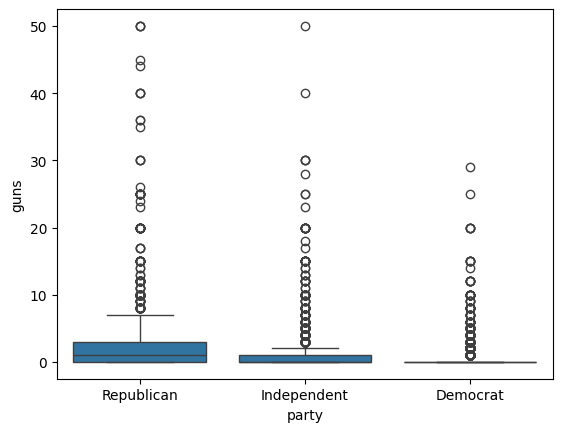

In [63]:
# Create a boxplot to visualize the distribution of gun ownership across three partisan groups and interpret the visualization.

# YOUR CODE HERE
sns.boxplot(x='party',y='guns',data=df)

***
**Interpretaton question 1:**

You are interested in understanding the differences in gun ownership among individuals from different partisan groups. Formulate a null hypothesis and an alternative hypothesis.
***

**Your answer:** 

*Null Hypothesis:* 
There is no relationship between the number of guns owned by an individual and different party groups. <br>
*Alternative Hypothesis:* 
There exists relationship between the number of guns owned by individuals and different party groups.

## Perform ANOVA test

In [64]:
# Perform ANOVA test comparing the mean number of guns owned among three partisan groups.

anova = f_oneway(df['guns'][df['party'] == 'Democrat'],
                         df['guns'][df['party'] == 'Republican'],
                         df['guns'][df['party'] == 'Independent'])

print(anova)

F_onewayResult(statistic=135.08004562809072, pvalue=2.4524507862127697e-58)


***

**Interpretaton question 2:** 

Interpret the findings of your ANOVA test. 
Explain why you accept/reject the alternative hypothesis.
Provide an intuitive explanation and then also one in which you demonstrate your mathematical knowledge, while using the terms "mean", "variance", "p-value", "f-statistic" in your answer.


***


**Your answer:**


I accept the alternative hypothesis. Here is the reason: Variances are the sum of the squared deviations from the mean. F statistic which is also called F value is the mean square of each independent variable divided by the mean square of the residuals. It's the ratio of between-groups to within-groups variances as well. The larger the F value, the more likely it is that the variation associated with the independent variable is real and not due to chance. The F statistic of this test is 135.08004562809072. It's big enough to prove that this there are differences among the levels of the independent variable and test is valid. P value here is the p value of the F statistic. This shows how likely it is that the F value calculated from the test would have occurred if the null hypothesis of no difference among group means were true. We ususally compare it with 0.05. In the test above, the p value is much lower than 0.05. This means the null hypothesis is unlikely to happen which also means we can accept the alternative hypothesis that the number of guns owned by individuals is related to different party groups.

## Post-hoc analysis

The ANOVA test can tell you if differences in group means are significant. However, ANOVA cannot identify which specific differences between pairs of means are significant. For this, you need to use post-hoc tests. You should conduct post-hoc tests only if your ANOVA results are statistically significant.

In [65]:
# If your ANOVA result is significant, perform a post-hoc analysis using Tukey’s Method.
# Tukey’s method is the most commonly used post-hoc test for comparing all possible group pairings.

tukey = pairwise_tukeyhsd(endog=df['guns'], groups=df['party'], alpha=0.05)

print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
   group1      group2   meandiff p-adj lower  upper  reject
-----------------------------------------------------------
   Democrat Independent   0.6372   0.0 0.4079 0.8665   True
   Democrat  Republican    1.618   0.0 1.3868 1.8492   True
Independent  Republican   0.9808   0.0 0.7399 1.2217   True
-----------------------------------------------------------


The rows of the table identify the groups to be compared. For example, the first row compares 'Democrats' with 'Independents'.

The 'meandiff' column represents the difference in means between the groups, where a positive value indicates that the second group has a higher mean than the first group.

The 'p-adj' column shows the statistical significance.

The 'lower' and 'upper' columns provide the lower and upper bounds of the 95% confidence interval for the mean difference.

The 'reject' column indicates a statistically significant difference between the group means. A value of 'False' means that the null hypothesis of equal means for that particular pairwise comparison is not rejected.

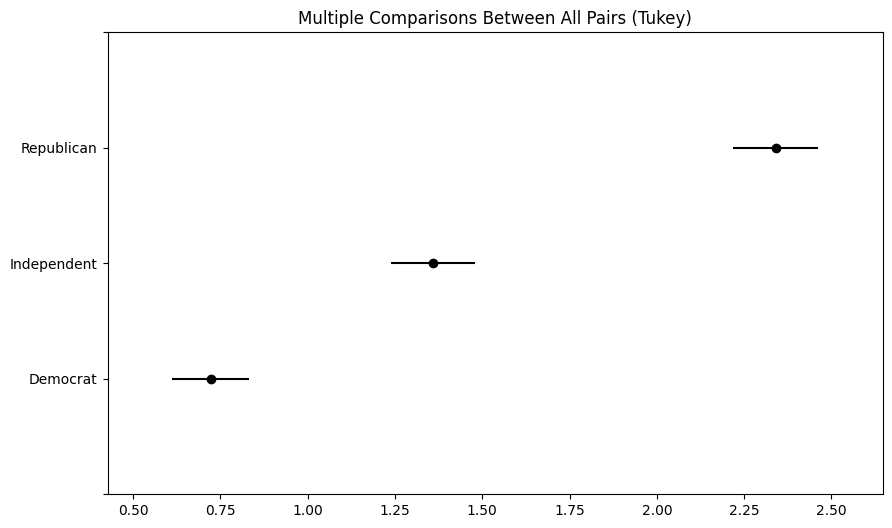

In [66]:
# You can also plot the results to explore them visually
tukey.plot_simultaneous()
plt.show()

***

**Interpretaton question 3:** 

Interpret the findings of your post-hoc test. Explain which specific group means differ. 
Provide an intuitive explanation and then also one in which you demonstrate your mathematical knowledge, while using the terms "mean difference", "confidence interval", "p-value", "statistical significance"in your answer.


***


**Your answer:** 

This tells us that there is statistical significance between Democrat and Republican, with a mean difference of 1.618 gun (adjusted p value < 0.01) which can be 95% confident that the overall mean is between 1.3868 and 1.8492 guns; between Democrat and Independent, with a mean difference of 0.6372 gun (adjusted p value < 0.01) which can be 95% confident that the overall mean is between 0.4079 and 0.8665 guns;between Republican and Independent, with a mean difference of 0.9808 (adjusted p value < 0.01) which can be 95% confident that the overall mean is between 0.7399 and 1.2217 guns.

## ANOVA assumptions

It's essential to test for ANOVA assumptions before conducting the analysis. However, since we have already conducted ANOVA without testing its assumptions, let's address them now. Testing these assumptions ensures the validity and reliability of our analysis

ANOVA tests have the same assumptions as other linear models. ANOVA assumptions are:

1. The dependent variable is continuous and you have at least one categorical independent variable.
2. The observations are independent.
3. The groups should have roughly equal variances.
4. The data in the groups should follow a normal distribution.

Let's look at each of them in more detail.

**1. The dependent variable is continuous and you have at least one categorical independent variable.**

**2. The observations are independent.**
This assumption means that the observations in one group should not be influenced by the observations in another group, and each observation in the dataset is collected without being influenced by the other observations in the dataset.

**3. The groups should have roughly equal variances.**

In [67]:
# We will use Levene's test equality of variances

stat, p = levene(df[df['party'] == 'Democrat']['guns'],
                 df[df['party'] == 'Republican']['guns'],
                 df[df['party'] == 'Independent']['guns'])

print(f"Levene's test statistic: {stat}, p-value: {p}")

Levene's test statistic: 142.5398373273391, p-value: 1.8533382029794984e-61


If the p-value of Levene's test is less than commonly established significance level in statistical tests, then the variances are not equal across groups. 

**4. The data in the groups should follow a normal distribution.**

In [68]:
# You can visualize the distribution of your 'guns' variable to explore it visually.
# However, a more reliable method involves using a statistical test. In this case, we will use D'Agostino's K^2 test.

stat, p = normaltest(df['guns'])
print(f"D'Agostino's K^2 test statistic: {stat}, p-value: {p}")

D'Agostino's K^2 test statistic: 8118.6839259285325, p-value: 0.0


Significant D'Agostino's K^2 test indicates that the data is not normally distributed.

***

**Interpretaton question 4:** 

Describe if the assumptions 1 and 2 are met. Do you have the right types of variables to run your ANOVA test? Do you think that observations are independent of each other? You might want to read a bit more about the ANES dataset to address the second assumption.

Determine whether assumptions 3 and 4 are satisfied. Do your groups exhibit equal variances, and is your dependent variable normally distributed?

What do the outcomes of your assumption testing imply for your ANOVA results? Can you proceed with the ANOVA test or not? If yes, explain why. If no, provide your reasoning.


***


**Your answer:** 

1. I think Assumptions 1 and 2 are satisfied. Because a continuous variable is a variable whose value is obtained by measuring, the data here is also measured. And it is also required that the dependent variable be at least one categorical variable. In this example, the dependent variable is parties, which is a categorical variable. So they meet the requirement for the first assumptions. I think the observation are independent, because they do not convey information about each other.<br>

2. Assumptions 3 and 4 are not satisfied. Because in the Levene's test, the p value is much lower than commonly established significance level. So they don't have roughly equal variance which doesn't reach the third assumption. For the forth, we can find out they don't follow a normal distribution through D'Agostino's K^2 test.<br>

3. The outcomes of  my assumption testing imply for my ANOVA results: uneven variances, ANOVA may produce distorted results. Because ANOVA assumes that the variances of each group are equal, if this assumption is not true, the results of ANOVA may be inaccurate; the data does not follow a normal distribution: The data does not follow a normal distribution, and the assumptions of ANOVA are no longer true, resulting in unreliable results. The assumption testing results show that the assumptions of ANOVA are not valid. I cannot continue to perform standard ANOVA tests because this will affect the accuracy of the experimental data and lead to wrong conclusions.

## Task 2: Explore more differences among these political groups

Choose another continuous variable from the dataset (refer to the ANES codebook for this).

Following the same procedure, conduct another ANOVA test to examine how these three political groups differ based on another characteristic.

Run the ANOVA test, perform ad-hoc tests if your findings are significant, and check for ANOVA assumptions.

*Null Hypothesis:* 
There is no relationship between the number of their grandparents who were not born in the US and different party groups. <br>
*Alternative Hypothesis:* 
There exists relationship between the number of their grandparents who were not born in the US and different party groups.

In [69]:
# In this ANOVA test, I will compare the relationship between the three political groups(Democrat, Republican, and Independent) 
# and how many their grandparents were born outside the US.
# Because in the test above, we have cleaned the data of party, so we can just use that without any corrections.
# Rename the 'V201555' variable into 'gp_outside' variable.
df.rename(columns={'V201555': 'gdparents'}, inplace=True)

In [70]:
# In the 'guns' variable, recode -9 and -8 as missing values.
df.loc[df['gdparents'].isin([-9,-8]),'gdparents'] = np.nan

In [71]:
# Drop missing values in the columns
df.dropna(subset=['gdparents'],inplace=True)

Text(0, 0.5, 'The numbersnof grandparents born outside the US')

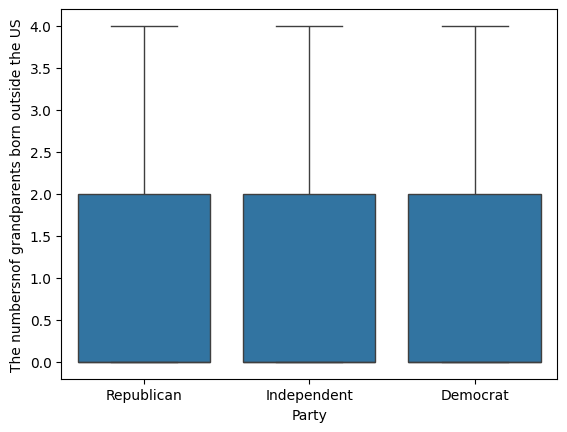

In [87]:
sns.boxplot(x='party',y='gdparents',data=df)
plt.xlabel('Party')
plt.ylabel('The numbersnof grandparents born outside the US')

In [73]:
# Conduct an ANOVA test
anova = f_oneway(df['gdparents'][df['party'] == 'Democrat'],
                         df['gdparents'][df['party'] == 'Republican'],
                         df['gdparents'][df['party'] == 'Independent'])

print(anova)

F_onewayResult(statistic=28.45234776967861, pvalue=4.911580977302452e-13)


I accept the alternative hypothesis. Here's why: The variance is the sum of the squares of the deviations from the mean. The F statistic, also known as the F value, is the mean square of each independent variable divided by the mean square of the residuals. It is also the ratio of between-group variance to within-group variance. The larger the F value, the more likely it is that the changes associated with the independent variable are real and not due to chance. The F statistic for this test is 28.45234776967861. It is large enough to demonstrate that there is a difference between the levels of the independent variables and that the test is valid. The P value here is the p value of the F statistic. This shows how likely it is that the F value calculated from the test will occur if the null hypothesis that there is no difference between group means is true. We usually compare this to 0.05. In the test above, the p-value is well below 0.05. This means that the null hypothesis is unlikely to occur, which also means that we can accept the alternative hypothesis that different party groups are associated with the number of grandparents not born in the United States.

In [83]:
print(df['gdparents'])
print(df['party'])

0       2.0
2       0.0
3       4.0
4       4.0
5       0.0
       ... 
8275    4.0
8276    4.0
8277    4.0
8278    0.0
8279    4.0
Name: gdparents, Length: 7302, dtype: float64
0        Republican
2       Independent
3        Republican
4       Independent
5       Independent
           ...     
8275     Republican
8276     Republican
8277       Democrat
8278     Republican
8279       Democrat
Name: party, Length: 7302, dtype: object


In [81]:
tukey = pairwise_tukeyhsd(endog=df['gdparents'], groups=df['party'], alpha=0.05)

print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
   Democrat Independent  -0.1397 0.0049 -0.2441 -0.0352   True
   Democrat  Republican  -0.3384    0.0 -0.4437 -0.2332   True
Independent  Republican  -0.1988 0.0001 -0.3084 -0.0891   True
--------------------------------------------------------------


From the adjusted p values of the three groups, we can find that they are all lower than 0.05 meaning that they have statistical significance between. From 'reject' column, they all show 'True', so we can reject the null hypothesis.

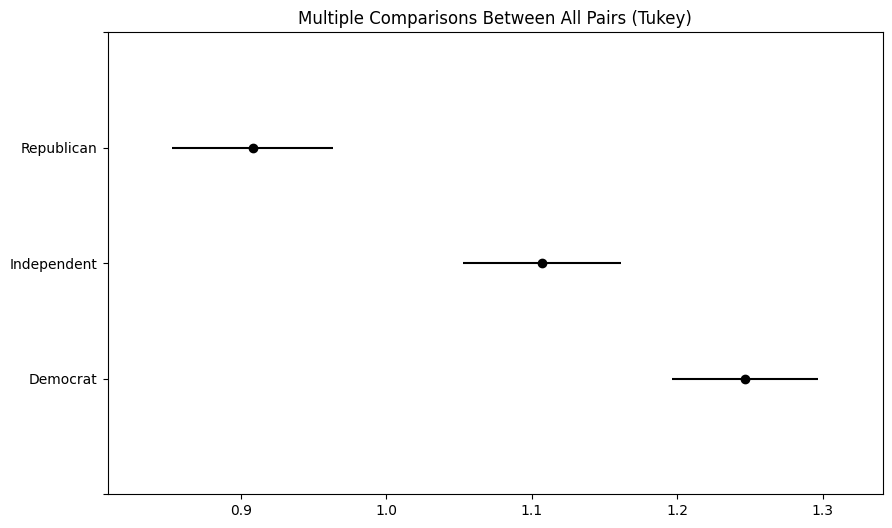

In [75]:
tukey.plot_simultaneous()
plt.show()

In [76]:
# We will use Levene's test equality of variances

stat, p = levene(df[df['party'] == 'Democrat']['gdparents'],
                 df[df['party'] == 'Republican']['gdparents'],
                 df[df['party'] == 'Independent']['gdparents'])

print(f"Levene's test statistic: {stat}, p-value: {p}")

Levene's test statistic: 28.452347769678624, p-value: 4.911580977302452e-13


From the two pieces of data, we can find that the p-value of this Levene's test is more than commonly established significance level in statistical tests, meaning the variances are equal across groups.

In [77]:
stat, p = normaltest(df['gdparents'])
print(f"D'Agostino's K^2 test statistic: {stat}, p-value: {p}")

D'Agostino's K^2 test statistic: 1207.6613100508835, p-value: 5.7501413205389204e-263


Significant D'Agostino's K^2 test indicates that the data is not normally distributed. This indicates that this analysis of variance may produce inaccurate or unreliable results, so we may want to use other methods (such as non-parametric tests) to test this hypothesis.